# Assignment 1

First we need to import a few modules, execute the cell below:

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [5]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    return(numpy.cos(x))

You can use the following cell to check that your code works for scalar arguments:

In [6]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [8]:
def df_analytic(x):
    #d/dx of cos(x)=-sin(x)
    return(-1*numpy.sin(x))

In [9]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [10]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [14]:
def backward_difference(f, x, dx):
    y = f(x)
    yprime = f(x-dx)
    ans = (y-yprime)/dx
    return(ans)

In [15]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


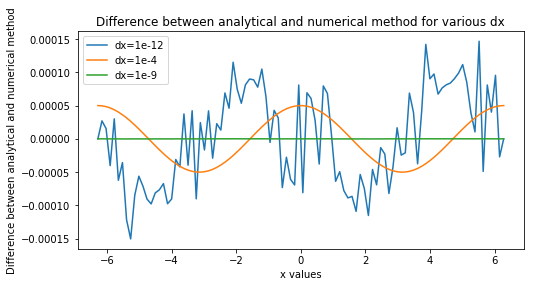

In [78]:
def backward_difference(f, x, dx):
    y = f(x)
    yprime = f(x-dx)
    ans = (y-yprime)/dx
    return(ans)
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
#xs defining 100 plots between -2 and 2 pi
df_dx_1 = backward_difference(f, xs, dx=1e-12) #blue
df_dx_2 = backward_difference(f, xs, dx=1e-4) #orange
df_dx_3 = backward_difference(f, xs, dx=1e-9) #green
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.xlabel('x values')
plt.ylabel('Difference between analytical and numerical method')
plt.title('Difference between analytical and numerical method for various dx')
plt.plot(xs, df_dx_1 - df_dx_analytical, label='dx=1e-12')
plt.plot(xs, df_dx_2 - df_dx_analytical, label='dx=1e-4')
plt.plot(xs, df_dx_3 - df_dx_analytical, label='dx=1e-9')
plt.legend()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


For dx=1e-4, the jumps between the given x points are too large, meaning that a reasonable amount of the curve between x and x-dx is missed out, leading to inaccurate results for almost every single reading.

For dx=1e-12 the jumps are too small, meaning that the computer cannot store sufficient data in standard form (due to the number of bits available for storage), and as x and x-dx are compared the difference is so minute that any rounding from insufficient bit storage produces a noticeable error compared to the analytical value. This "random" error also explains the erratic jumping in difference compared to the smoother dx=1e-4

Compared to both, dx=1e-9 provides almost no error against the analytical values.